In [ ]:
# pandas : Series, DataFrame , Panel
# numpy방식의 인덱싱이 가능 ,  + dict( 중복을 허용, 순서를 보장 )

In [3]:
import pandas as pd
data= {'a' : 0. , 'b' :1., 'c':2.}  # dict
s = pd.Series(data) # 1차원  , key가 인덱스로 변환됨
print(s['a'])       # key 인덱싱
print(list(s))
s = pd.Series(data, index=['b','c','d','a'])  # 행이름
print(s['a'])
print(s['d'])
list(s)

0.0
[0.0, 1.0, 2.0]
0.0
nan


[1.0, 2.0, nan, 0.0]

In [4]:
s = pd.Series([1,2,3,4,5], index = ['a','b','c','d','e'])
print("인덱스에 의한 출력 ", s[0])  # 순서에 의한 인덱스 
print(s['a'])                       #key에 의한 인덱스 ( 총 2개 )
print(s[:3])      # numpy
print("음수", s[-3:])
s['a'] = 100
print(s['a'])
s['f'] = 10
print(s['f'])
print('filtering에 의한 출력  ', s[s>4]) # boolean index로 바뀜( s[True,False,Flase,..])
print(s)
print(s*2)

인덱스에 의한 출력  1
1
a    1
b    2
c    3
dtype: int64
음수 c    3
d    4
e    5
dtype: int64
100
10
filtering에 의한 출력   a    100
e      5
f     10
dtype: int64
a    100
b      2
c      3
d      4
e      5
f     10
dtype: int64
a    200
b      4
c      6
d      8
e     10
f     20
dtype: int64


In [10]:
import numpy as np
data = np.array(['a','b','c','d'])  # ndarray
s = pd.Series(data)  # ndarray를 이용해 시리즈 초기화
print("Series Data : ", s.values)  # 값만 가져옴
print("Series index : ", s.index)  
# RangeInex 객체가 자동으로 생성되어 있음( index의 default값)
print("Series 초기화 : \n", s)
print("Series index의 값 : ",s.index.values)
print(s[0])
print(s.head())  # tail()
print(s.value_counts())  # 도수 분포표
print(s.value_counts(normalize = True))  # 사이즈 1로 => 상대도수분포표
print(s.describe()) # 숫자변수에 대해서만 출력 가능
# dtype : 문자열인 경우에 object로 나옴
print("데이터 타입은 : ", s.dtypes)
print("차원 : ", s.ndim)
print("차수 : ", s.shape)

Series Data :  ['a' 'b' 'c' 'd']
Series index :  RangeIndex(start=0, stop=4, step=1)
Series 초기화 : 
 0    a
1    b
2    c
3    d
dtype: object
Series index의 값 :  [0 1 2 3]
a
0    a
1    b
2    c
3    d
dtype: object
c    1
a    1
d    1
b    1
dtype: int64
c    0.25
a    0.25
d    0.25
b    0.25
dtype: float64
count     4
unique    4
top       c
freq      1
dtype: object
데이터 타입은 :  object
차원 :  1
차수 :  (4,)


In [13]:
sdata = {'Ohio' : 35000, "Texas":71000, "Oregon" : 16000,
        "Utah" : 5000}
obj3 = pd.Series(sdata)
print(obj3)
print(obj3.shape)
states = ['California', "Ohio", 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index = states)  # california는 데이터가 없기떄문에 NaN
print(obj4)
print("시리즈 인덱스 : ", obj3.index)
print("시리즈 인덱스 : ", obj4.index)
print("null이 있는가 : ", pd.isnull(obj4))  # data가 null이면 True
print("결측치가 있는가 : ", pd.notnull(obj4)) #data가 있으면 True
print("객체 출력")
print("obj3을 출력합니다.\n", obj3)
print("obj4을 출력합니다.\n", obj4)
print("연산결과를 출력합니다.\n", obj3 + obj4)
# index가 다름 -> 짝이 없으면 NaN



Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
(4,)
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
시리즈 인덱스 :  Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')
시리즈 인덱스 :  Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object')
null이 있는가 :  California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
결측치가 있는가 :  California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
객체 출력
obj3을 출력합니다.
 Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64
obj4을 출력합니다.
 California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64
연산결과를 출력합니다.
 California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [15]:
s = pd.Series(['A','B','Aaba','Baca',np.nan,'CABA','cat'])
s.str.count('a')

0    0.0
1    0.0
2    2.0
3    2.0
4    NaN
5    0.0
6    1.0
dtype: float64

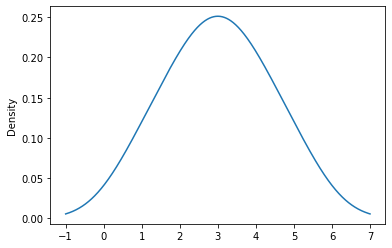

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
s = pd.Series([1,2,2.5,3,3.5,4,5])
s.plot.kde() #kernul density estimate
   # 데이터가 없는 부분은 kernel로 예측    * kernel : 가우시안 분포
plt.show()

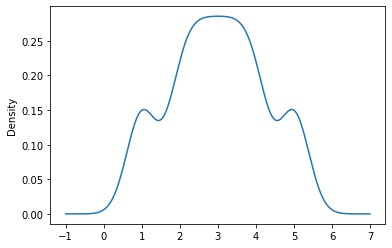

In [20]:
s.plot.kde(bw_method = 0.3)   # 과적합
plt.show()

In [21]:
import pandas as pd
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [22]:
data['area']
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [23]:
# 객체 비교   :  is None
data.area is data['area']

True

In [24]:
# 객체에서 벼수를 신시간 추가하는 것이 가능
# append
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [25]:
data.values # 값만 가져오기 : ndarray => numpy 함수로 처리

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [27]:
data.T #( 데이터 전치 )

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [28]:
data.values[0]  # 행값

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [40]:
data.iloc[:3,:2]  # 숫자  #행과열로 입력 

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [41]:
data.loc[:'Illinois',:'pop']  # key   

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [43]:
print(data.iloc[0,2])
data.iloc[0,2] = 90
data


90.41392608386974


,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [44]:
data['Florida' : 'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [47]:
data[['area','density']]

,area,density
California,423967,90.000000
Texas,695662,38.018740
New York,141297,139.076746
Florida,170312,114.806121
Illinois,149995,85.883763


In [56]:
import pandas as pd
import numpy as np

d = {'Name':pd.Series(['김하나','이하나','삼하나','사하나','오하나','육하나','칠하나', '팔하나']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}
d

{'Name': 0    김하나
 1    이하나
 2    삼하나
 3    사하나
 4    오하나
 5    육하나
 6    칠하나
 7    팔하나
 dtype: object, 'Age': 0    25
 1    26
 2    25
 3    23
 4    30
 5    29
 6    23
 dtype: int64, 'Rating': 0    4.23
 1    3.24
 2    3.98
 3    2.56
 4    3.20
 5    4.60
 6    3.80
 dtype: float64}

In [57]:
df = pd.DataFrame(d)
print(df)
print("축 : ", df.axes)
print('데이터 타입 : ', df.dtypes)
print("데이터 타입 : ", df.get_dtype_counts)  # unique : 중복유무
print("비었나?  : ", df.empty)
print("차원 : ",df.ndim)
print("차수 : ",df.shape)
print("사이즈 : ",df.size)
print("값 : ",df.values)
print(df.head(2))
print(df.tail(2))

  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN
축 :  [RangeIndex(start=0, stop=8, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]
데이터 타입 :  Name       object
Age       float64
Rating    float64
dtype: object
데이터 타입 :  <bound method NDFrame.get_dtype_counts of   Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
2  삼하나  25.0    3.98
3  사하나  23.0    2.56
4  오하나  30.0    3.20
5  육하나  29.0    4.60
6  칠하나  23.0    3.80
7  팔하나   NaN     NaN>
비었나?  :  False
차원 :  2
차수 :  (8, 3)
사이즈 :  24
값 :  [['김하나' 25.0 4.23]
 ['이하나' 26.0 3.24]
 ['삼하나' 25.0 3.98]
 ['사하나' 23.0 2.56]
 ['오하나' 30.0 3.2]
 ['육하나' 29.0 4.6]
 ['칠하나' 23.0 3.8]
 ['팔하나' nan nan]]
  Name   Age  Rating
0  김하나  25.0    4.23
1  이하나  26.0    3.24
  Name   Age  Rating
6  칠하나  23.0     3.8
7  팔하나   NaN     NaN


In [62]:
print("합계 : ", df.sum())  #전체 데이터 적용
print(df.mean())    # 숫자만 적용
print(df.std())  #standard deviation : 표준편차
print(df.describe())  # 숫자 데이터만 적용
print("오브젝트 ", df.describe(include = ['object']))
print(df.describe(include = 'all'))

합계 :  Name      김하나이하나삼하나사하나오하나육하나칠하나팔하나
Age                            181
Rating                       25.61
dtype: object
Age       25.857143
Rating     3.658571
dtype: float64
Age       2.734262
Rating    0.698628
dtype: float64
             Age    Rating
count   7.000000  7.000000
mean   25.857143  3.658571
std     2.734262  0.698628
min    23.000000  2.560000
25%    24.000000  3.220000
50%    25.000000  3.800000
75%    27.500000  4.105000
max    30.000000  4.600000
오브젝트         Name
count     8
unique    8
top     사하나
freq      1
       Name        Age    Rating
count     8   7.000000  7.000000
unique    8        NaN       NaN
top     사하나        NaN       NaN
freq      1        NaN       NaN
mean    NaN  25.857143  3.658571
std     NaN   2.734262  0.698628
min     NaN  23.000000  2.560000
25%     NaN  24.000000  3.220000
50%     NaN  25.000000  3.800000
75%     NaN  27.500000  4.105000
max     NaN  30.000000  4.600000


In [71]:
data = {'state' : ['경기','강원',"서울",'충북','인천'],
       'year' : [2000,2001,2002,2001,2002],
       'pop' : [1.5,1.7,3.6,2.4,2.9]}
frame2 = pd.DataFrame(data, columns = ['year','state','pop','debt'],
                     index = ['one','two','three','four','five'])
print(data)
frame2

{'state': ['경기', '강원', '서울', '충북', '인천'], 'year': [2000, 2001, 2002, 2001, 2002], 'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}


,year,state,pop,debt
one,2000,경기,1.5,NaN
two,2001,강원,1.7,NaN
three,2002,서울,3.6,NaN
four,2001,충북,2.4,NaN
five,2002,인천,2.9,NaN


In [82]:
# 1) state만 출력하세요
frame2['state']
frame2.state
# 2) debt 열을 추가하고 모든 값을 16.5로 입력하세요.
frame2['debt'] = 16.5
print(frame2)

# 3) debt를 pd.Series([-1.2,-1.5,-1.7],
#          index = ['two','four','five'])로 수정하세요

val = pd.Series([-1.2,-1.5,-1.7],index = ['two','four','five'])
frame2['debt'] = val
print(frame2)

# 4) 파생변수 'estern'에 주소가 서울인가를 따져 서울은 True, 아니면 False로 입력하세요
frame2['estern'] = frame2['state']=='서울'
print(frame2)

# 변수 지우기
del frame2['debt']
frame2

#행렬로 데이터 찾기
print("행렬로 데이터 찾기 \n")
print(frame2['year']['one'])  # 열이 먼저옴
print(frame2.loc['one','year']) #행이 먼저옴

       year state  pop  estern  debt
one    2000    경기  1.5   False  16.5
two    2001    강원  1.7   False  16.5
three  2002    서울  3.6    True  16.5
four   2001    충북  2.4   False  16.5
five   2002    인천  2.9   False  16.5
       year state  pop  estern  debt
one    2000    경기  1.5   False   NaN
two    2001    강원  1.7   False  -1.2
three  2002    서울  3.6    True   NaN
four   2001    충북  2.4   False  -1.5
five   2002    인천  2.9   False  -1.7
       year state  pop  estern  debt
one    2000    경기  1.5   False   NaN
two    2001    강원  1.7   False  -1.2
three  2002    서울  3.6    True   NaN
four   2001    충북  2.4   False  -1.5
five   2002    인천  2.9   False  -1.7
행렬로 데이터 찾기 

2000
2000


In [85]:
# 시간 함수
# 리눅스 : timestamp  -  1970년 1월 1일 이후로 경과된 mili초로 표현

# pandas 에서는 nano초 까지 표현
# 시간인덱스 : 시계열분석 : DateTimeIndex,PeriodIndex   주기값
# 내부적으로 데이터를 저장할때는 timestamp로 저장

import time
time.time()  # 2000.1.1부터 경과된 mili초로 표현

#datetime : 날짜와 시간을 함께 표현

1578383446.3634472

In [89]:

import time
print(time.time())   #밀리초로 표현
print(time.localtime())  #년 월 일 시 분 초
yesterday = time.localtime(time.time()- 60*60*24)  # 하루 전 지금 == 시간연산도 가능함
print(yesterday)
time.strftime("%Y %m %d")  # 시간을 문자열로 변경해서 출력
print(type(time.strftime("%Y %m %d"))) # 문자열

1578383676.0765553
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=7, tm_hour=16, tm_min=54, tm_sec=36, tm_wday=1, tm_yday=7, tm_isdst=0)
time.struct_time(tm_year=2020, tm_mon=1, tm_mday=6, tm_hour=16, tm_min=54, tm_sec=36, tm_wday=0, tm_yday=6, tm_isdst=0)
<class 'str'>


In [100]:
# 파이썬에서 시간처리 방법

from datetime import date, time, datetime, timedelta   # timedelta : 시간차
now = datetime.now() #년 월 일 시 분 초
print(now)
print(now.year, now.month, now.day)
now.timestamp() # 시간을 밀리초로 표현하고 싶을 때 사용 

2020-01-07 17:01:08.067070
2020 1 7


1578384068.06707

In [104]:
now_str = now.strftime('%Y-%m-%d %H:%M:%S') # 문자열
print(now_str)
datetime.strptime(now_str,'%Y-%m-%d %H:%M:%S') # 날짜형식으로 변환( 파싱 )


2020-01-07 17:01:08


datetime.datetime(2020, 1, 7, 17, 1, 8)

In [99]:
delta = datetime(2015, 1, 7) - datetime(2010,6,24,8,15)
print("시간차는 : ",delta, delta.days, delta.seconds)

시간차는 :  1657 days, 15:45:00 1657 56700


In [108]:
start = datetime(2020,1,7)
print(start + timedelta(12))  # 기본이 day
print(start + timedelta(hours= -5))

2020-01-19 00:00:00
2020-01-06 19:00:00


In [112]:
# pandas에서 시간처리 방법

import pandas as pd
print(pd.datetime.now())
print(pd.Timestamp("2017-03-01"))
print(pd.Timestamp(1587687255,unit = 's'))

2020-01-07 17:07:55.163468
2017-03-01 00:00:00
2020-04-24 00:14:15


In [114]:
# DatetimeIndex 생성 : 행 : index  열 : columns

print(pd.date_range("11:00", "13:30", freq = "30min"))  #30분 단위로 11:00부터 13:30분까지
print("시간으로  ", pd.date_range("11:00","13:30", freq = "30min").time) # 다른것 제외하고 시간만 
print(pd.date_range("11:00","13:30",freq = "H")) # (H)시간단위로


DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 11:30:00',
               '2020-01-07 12:00:00', '2020-01-07 12:30:00',
               '2020-01-07 13:00:00', '2020-01-07 13:30:00'],
              dtype='datetime64[ns]', freq='30T')
시간으로   [datetime.time(11, 0) datetime.time(11, 30) datetime.time(12, 0)
 datetime.time(12, 30) datetime.time(13, 0) datetime.time(13, 30)]
DatetimeIndex(['2020-01-07 11:00:00', '2020-01-07 12:00:00',
               '2020-01-07 13:00:00'],
              dtype='datetime64[ns]', freq='H')


In [124]:
# DatetimeIndex 생성

# 지정된 시간을 index로 생성
print(pd.to_datetime(pd.Series(['Jul 31, 2009','2010-01-10',None]))) 
print(pd.to_datetime(['2005/11/23', '2010.12.31', None])) 

print(pd.date_range('1/1/2017', periods = 5)) # 일간격 : 기본주기는 날짜
print(pd.date_range('1/1/2017', periods = 5, freq= 'M')) #

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]
DatetimeIndex(['2005-11-23', '2010-12-31', 'NaT'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31'],
              dtype='datetime64[ns]', freq='M')


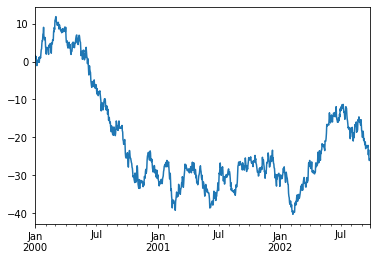

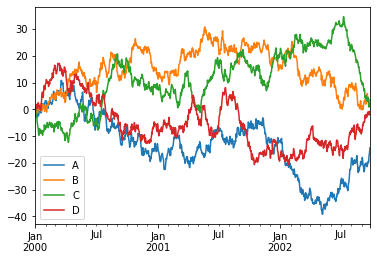

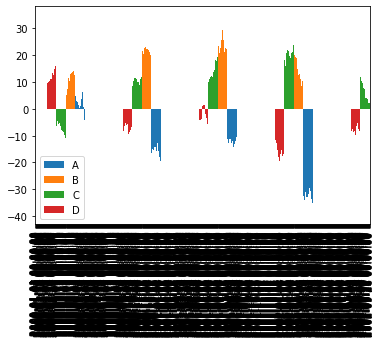

In [130]:
ts = pd.Series(np.random.randn(1000),
              index = pd.date_range("1/1/2000", periods = 1000))  # 1000일동안
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000,4), index = ts.index,  # 1000x4 데이터
                 columns = list("ABCD"))
df = df.cumsum()
df.plot()
df.plot.bar()

In [164]:
# 문제 다음 데이터를 데이터프레임에 저장하시요
#         지역  2018     2017 2016 2015 2015-2018 증가율
# 서울 수도권  9904312 9631482 9762546 9853972    0.0283
# 부산 경상권  3448737 3393191 3512547 3655437    0.0163
# 인천 수도권  2890451 2632035 2517680 2466338    0.0982
# 대구 경상권  2466052 2431774 2456016 2473990    0.0141 

columns = ['지역', '2018','2017','2016','2015','2015-2018 증가율']
index = ['서울','부산','인천','대구']
# 문제 : 2015-2018 증가율을 %로 변경하세요
# 문제 : 2015- 2017 증가율을 구해서 변수를 추가하세요
#        열 이름 : 2015-2018 증가율
data = []
df = pd.DataFrame(data, columns = columns, index = index)
df['지역']= ['수도권','경상권','수도권','경상권']
df['2018'] = [9904312,3448737,2890451,2466052]
df['2017'] = [9631482,3393191,2632035,2431774]
df['2016'] = [9762546,9762546,2517680,2456016]
df['2015'] = [9853972,3655437,2466338,2473990]
df['2015-2018 증가율'] = [0.0283,0.0163,0.0982,0.0141]

per = (df.values[:,1]-df.values[:,4])/df.values[:,1] * 100
df['2015-2018 증가율'] = per
df

,지역,2018,2017,2016,2015,2015-2018 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.508263
부산,경상권,3448737,3393191,9762546,3655437,-5.9935
인천,수도권,2890451,2632035,2517680,2466338,14.6729
대구,경상권,2466052,2431774,2456016,2473990,-0.321891


In [167]:
str(0.02) + '%'

'0.02%'

0
1
2
3
4
5
6
7
8
9
